In [27]:
# some important libraries for analyzing data
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
# For ignoring warnings 
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Accessing data file
df = pd.read_csv(r"F:\Unified Mentor Datasets\HRDataset_v14.csv")

In [30]:
# Data pre-processing and cleaning 
# First 10 rows of data 
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [31]:
# Consize summary of 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [32]:
df['DOB'].sort_values(ascending = False).head(10)

229    12/31/84
166    12/27/88
21     12/27/58
171    12/26/76
20     12/22/70
247    12/21/74
249    12/17/87
54     12/17/75
208    12/11/76
178    12/10/86
Name: DOB, dtype: object

In [33]:
# Shape of the data 
df.shape

(311, 36)

In [34]:
# Dropping irrelevant columns 
df = df.drop(columns = ['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'ManagerID'])

In [35]:
# Converting data types (Typecasting)
from datetime import datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors = 'coerce').dt.date
df['DateofHire'] = pd.to_datetime(df['DateofHire'], errors = 'coerce').dt.date
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors = 'coerce').dt.date
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'], errors = 'coerce').dt.date

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   Salary                      311 non-null    int64  
 3   Position                    311 non-null    object 
 4   State                       311 non-null    object 
 5   Zip                         311 non-null    int64  
 6   DOB                         311 non-null    object 
 7   Sex                         311 non-null    object 
 8   MaritalDesc                 311 non-null    object 
 9   CitizenDesc                 311 non-null    object 
 10  HispanicLatino              311 non-null    object 
 11  RaceDesc                    311 non-null    object 
 12  DateofHire                  311 non-null    object 
 13  DateofTermination           104 non

In [37]:
df['DOB'].sort_values(ascending = False).head(10)

151    2073-12-08
78     2073-11-28
79     2073-09-23
239    2073-05-27
243    2073-04-05
265    2073-03-26
261    2073-03-12
174    2073-02-14
232    2073-01-12
240    2072-11-21
Name: DOB, dtype: object

In [38]:
# Replacing year values 2000 to 1900
# Converting date values to str
df['DOB'] = df['DOB'].astype(str)
df['DOB'] = df['DOB'].str.replace(r'^20', '19', regex = True)

In [39]:
df['DOB'].sort_values(ascending = False).head(10)

189    1992-08-17
110    1992-06-18
135    1992-05-07
80     1991-09-05
288    1991-05-23
138    1991-01-28
102    1990-10-01
23     1990-09-21
28     1990-08-24
207    1990-05-11
Name: DOB, dtype: object

In [40]:
# Changing data type to datetime format
df['DOB'] = pd.to_datetime(df['DOB'], errors = 'coerce').dt.date

In [41]:
# Checking data types


In [42]:
# Null values in dataset 
df.isnull().sum()

Employee_Name                   0
EmpID                           0
Salary                          0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
Absences                        0
dtype: int64

In [43]:
# Filled null date records with current date
from datetime import datetime
df['DateofTermination'] = df['DateofTermination'].fillna('NotTerminated')

In [44]:
df['DateofTermination'].isnull().sum()

0

In [45]:
# Descriptive statistics
df.describe()

,EmpID,Salary,Zip,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,69020.684887,6555.482315,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,25156.636930,16908.396884,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,45046.000000,1013.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,55501.500000,1901.500000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,62810.000000,2132.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,72036.000000,2355.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,250000.000000,98052.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [46]:
# Unique departments
unique_dept = df['Department'].unique()
print(unique_dept)

['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']


In [47]:
# Group by department to get average salary and engagement
dept_summary = df.groupby('Department').agg({
    'Salary' : 'mean',
    'EngagementSurvey' : 'mean',
    'EmpSatisfaction' : 'mean'
}).reset_index()
print(dept_summary)

             Department         Salary  EngagementSurvey  EmpSatisfaction
0         Admin Offices   71791.888889          4.393333         3.555556
1      Executive Office  250000.000000          4.830000         3.000000
2                 IT/IS   97064.640000          4.154000         3.960000
3     Production          59953.545455          4.129569         3.861244
4                 Sales   69061.258065          3.818710         4.032258
5  Software Engineering   94989.454545          4.061818         4.090909


In [48]:
# Termination group by department
terminated_employees = df[df['DateofTermination'].notna()] # Filtered data to include only terminated employees

termination_by_department = terminated_employees.groupby(['Department', 'TermReason']).size().reset_index(name='TerminationCount')
print(termination_by_department)

              Department                        TermReason  TerminationCount
0          Admin Offices                 N/A-StillEmployed                 7
1          Admin Offices                     career change                 1
2          Admin Offices                  no-call, no-show                 1
3       Executive Office                 N/A-StillEmployed                 1
4                  IT/IS                  Another position                 1
5                  IT/IS     Learned that he is a gangster                 1
6                  IT/IS                 N/A-StillEmployed                40
7                  IT/IS                     career change                 1
8                  IT/IS                             hours                 2
9                  IT/IS                    medical issues                 1
10                 IT/IS                  no-call, no-show                 2
11                 IT/IS                       performance                 2

In [49]:
# Correlation matrix
correlation = df[['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']].corr()
print(correlation)

                        Salary  EngagementSurvey  EmpSatisfaction  \
Salary                1.000000          0.064966         0.062718   
EngagementSurvey      0.064966          1.000000         0.187105   
EmpSatisfaction       0.062718          0.187105         1.000000   
SpecialProjectsCount  0.508333          0.013227         0.033877   
DaysLateLast30       -0.069443         -0.585232        -0.235412   
Absences              0.082382         -0.008771         0.075222   

                      SpecialProjectsCount  DaysLateLast30  Absences  
Salary                            0.508333       -0.069443  0.082382  
EngagementSurvey                  0.013227       -0.585232 -0.008771  
EmpSatisfaction                   0.033877       -0.235412  0.075222  
SpecialProjectsCount              1.000000       -0.092494 -0.020452  
DaysLateLast30                   -0.092494        1.000000  0.001833  
Absences                         -0.020452        0.001833  1.000000  


In [50]:
# Buiness decision moment for salary
# First Business decision moment
# Mean
print('1. First Business Decision Moment')
avg_salary = df['Salary'].mean()
print('Average Salary - ' ,avg_salary)
# Median
med_salary = df['Salary'].median()
print('Median Salary - ',med_salary)

1. First Business Decision Moment
Average Salary -  69020.6848874598
Median Salary -  62810.0


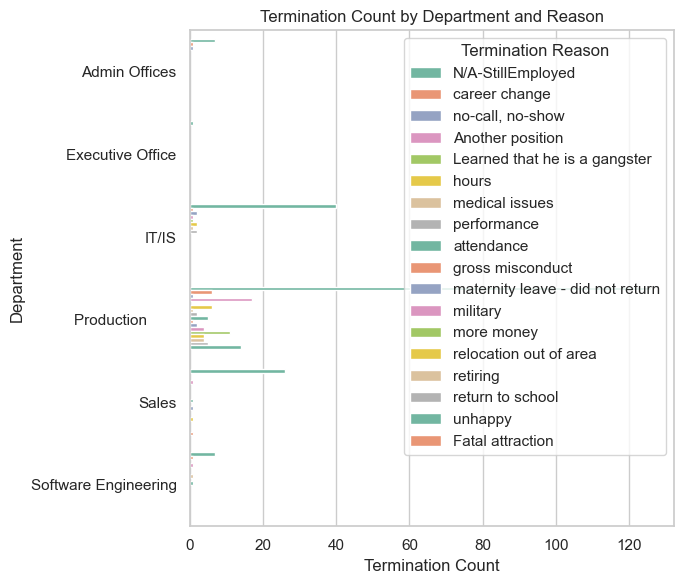

In [51]:
# Graphical representation 
# Set the style for Seaborn
sns.set(style='whitegrid')

# Bar chart for terminations by department
plt.figure(figsize=(7, 6))
sns.barplot(data=termination_by_department, x='TerminationCount', y='Department', hue='TermReason', palette='Set2')
plt.title('Termination Count by Department and Reason')
plt.xlabel('Termination Count')
plt.ylabel('Department')
plt.legend(title='Termination Reason', loc='upper right')
plt.tight_layout()
plt.show()

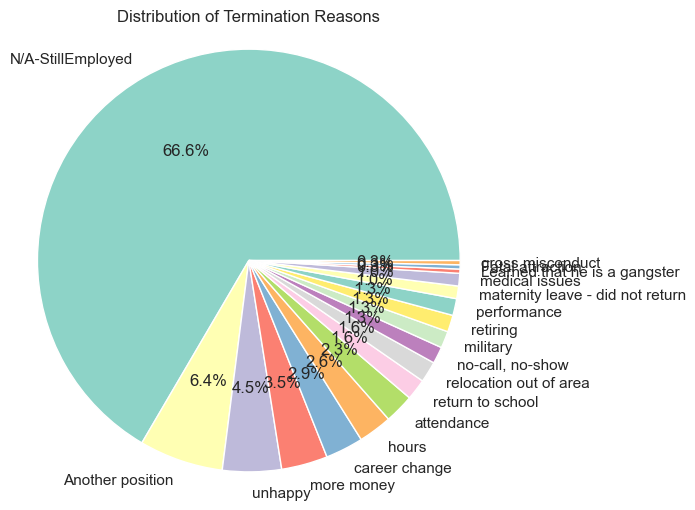

In [52]:
# Pie chart to visualize termination reasons distribution
termination_reason_count = terminated_employees['TermReason'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(termination_reason_count, labels=termination_reason_count.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Termination Reasons')
plt.axis('equal')
plt.show()

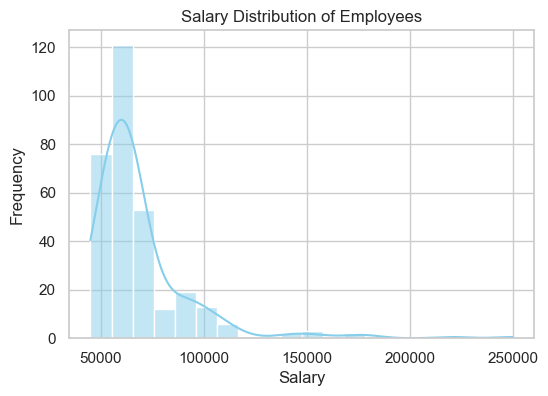

In [53]:
# Set the style for Seaborn
sns.set(style='whitegrid')

# Histogram of salary distribution
plt.figure(figsize= (6, 4))
sns.histplot(df['Salary'], bins=20, kde=True, color='skyblue')
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

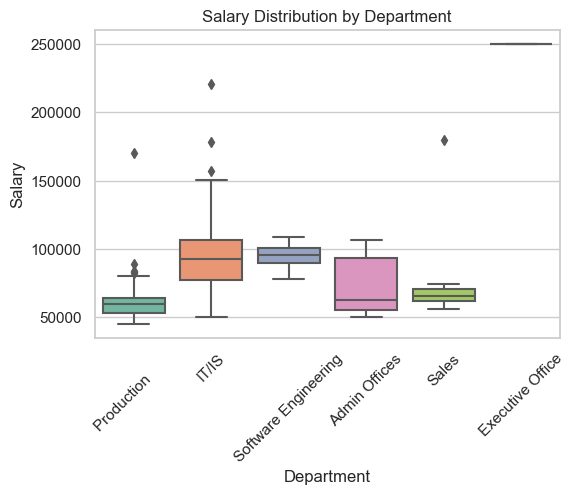

In [54]:
# Box plot of salary by department
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Department', y='Salary', palette='Set2')
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


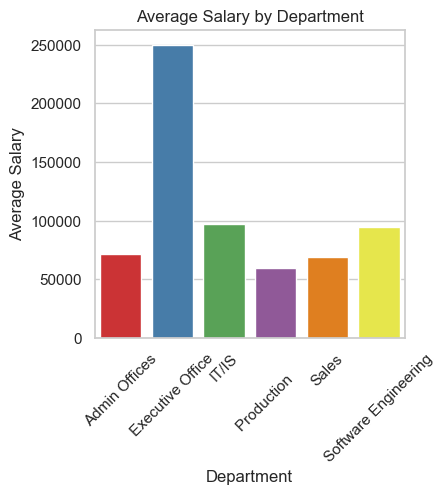

In [55]:
# Average salary by department
average_salary_by_department = df.groupby('Department')['Salary'].mean().reset_index()

# Bar plot of average salary by department
plt.figure(figsize=(4, 4))
sns.barplot(data=average_salary_by_department, x='Department', y='Salary', palette='Set1')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


In [56]:
# Exported clean dataset
df.to_csv('HR_Analyst_Cleaned.csv', index=False)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   Salary                      311 non-null    int64  
 3   Position                    311 non-null    object 
 4   State                       311 non-null    object 
 5   Zip                         311 non-null    int64  
 6   DOB                         311 non-null    object 
 7   Sex                         311 non-null    object 
 8   MaritalDesc                 311 non-null    object 
 9   CitizenDesc                 311 non-null    object 
 10  HispanicLatino              311 non-null    object 
 11  RaceDesc                    311 non-null    object 
 12  DateofHire                  311 non-null    object 
 13  DateofTermination           311 non